# Dataset:
You will be working with two datasets: Train and Test, both containing images of 40 individuals. Each dataset has been preprocessed for this assignment.

In [134]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Create PCA function that takes two inputs: dataset, and k= number of principle component, and return the transform data

In [135]:
def my_pca(Data,k):
    # Center the data by subtracting the mean of each feature
    mean = np.mean(Data, axis=0)
    centered_data = Data - mean

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Perform SVD on the covariance matrix
    U, S, Vt = np.linalg.svd(covariance_matrix)

    # Select the top k eigenvectors (principal components)
    top_k_components = U[:, :k]

    # Project the data into the PCA space
    transformed_data = centered_data.dot(top_k_components)

    return transformed_data


# Read your TrainData and Test data. Try to remove the last column of the training data and assign it to one variable, do same thing for the TestData

In [136]:
# write the code here
train_df = pd.read_csv('TrainData.csv')
test_df = pd.read_csv('TestData.csv')

# remove last column in  both train and test data and store it in y_train and y_test
train_last_col = train_df['T_10305'].values
test_last_col = test_df['Label'].values

train_df = train_df.drop(['T_10305'], axis=1).values
test_df = test_df.drop(['Label'], axis=1).values

# Apply my_pca

In [137]:
# write the code here


# Center the data by subtracting the mean of each feature
mean = np.mean(train_df, axis=0)
centered_data = train_df - mean
covariance_matrix = np.cov(centered_data, rowvar=False) # Calculate the covariance matrix
U, S, Vt = np.linalg.svd(covariance_matrix) # Perform SVD on the covariance matrix

# find k such that 95% of the variance is retained
total_variance = np.sum(S)
variance_retained = np.cumsum(S) / total_variance
k = np.argmax(variance_retained >= 0.95) + 1
print("k such that 95% of the variance is retained: ", k)

# apply PCA on train data using my_pca function
train_pca = my_pca(train_df, k)

k such that 95% of the variance is retained:  110


# Apply pca using sklearn

In [138]:
# write the code here

# apply pca using skelarn
pca = PCA(n_components=k)
pca.fit(train_df)
train_pca_sklearn = pca.transform(train_df)

# Create kernel PCA function that takes two inputs: dataset, and k= number of principle component, and return the transform data. In addition, you need to create three other function one for rbf_kernel, one for polynomial_kernel, and one for linear_kernel

In [139]:
#
def rbf_kernel(x, y, gamma=1.0):
    """
    Radial Basis Function (RBF) kernel.
    Build this function
    """
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def poly_kernel(x, y, degree=3):
    """
    Polynomial kernel.
    Build this function
    """
    return (np.dot(x, y) + 1) ** degree

def linear_kernel(x, y):
    """
    Linear kernel.
    Build this function
    """
    return np.dot(x, y)

def my_kpca(data, n_components, kernel_type='rbf', kernel_param=1.0):
    """
    Kernel Principal Component Analysis (KPCA) function.

    Parameters:
    - data: Input data as an ndarray of shape (n_samples, n_features).
    - n_components: Number of principal components to retain.
    - kernel_type: Type of kernel ('rbf', 'poly', or 'linear').
    - kernel_param: Kernel parameter (e.g., gamma for RBF, degree for polynomial).

    Returns:
    - Transformed data in the KPCA space.
    """

    " Build this function"

    n_samples, n_features = data.shape
    K = np.zeros((n_samples, n_samples))

    # Compute the kernel matrix K based on the specified kernel type and parameter
    for i in range(n_samples):
        for j in range(n_samples):
            if kernel_type == 'rbf':
                K[i, j] = rbf_kernel(data[i], data[j], gamma=kernel_param)
            elif kernel_type == 'poly':
                K[i, j] = poly_kernel(data[i], data[j], degree=kernel_param)
            elif kernel_type == 'linear':
                K[i, j] = linear_kernel(data[i], data[j])

    # Center the kernel matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Eigen decomposition of the centered kernel matrix
    eigvals, eigvecs = np.linalg.eigh(K)

    # Sort eigenvalues and eigenvectors in descending order
    eigvals = eigvals[::-1]
    eigvecs = eigvecs[:, ::-1]

    # Select the top n_components eigenvectors
    X_kpca = np.column_stack([eigvecs[:, i] for i in range(n_components)])

    return X_kpca

# Apply my_kpca on the Train data


In [140]:
# build your code here

# 2.1
train_kpca_rbf = my_kpca(train_df, k, kernel_type='rbf', kernel_param=1.0)

# 2.2
train_kpca_poly = my_kpca(train_df, k, kernel_type='poly', kernel_param=3)

# 2.3
train_kpca_linear = my_kpca(train_df, k, kernel_type='linear', kernel_param=1.0)

# Apply Kpca using sklearn on Training data

In [141]:
# build your code here

# apply kpca (rbf) using skelarn
kpca_rbf_sklearn = KernelPCA(n_components=k, kernel='rbf', gamma=1.0)
train_kpca_rbf_sklearn = kpca_rbf_sklearn.fit_transform(train_df)

# apply kpca (poly) using skelarn
kpca_poly_sklearn = KernelPCA(n_components=k, kernel='poly', degree=3)
train_kpca_poly_sklearn = kpca_poly_sklearn.fit_transform(train_df)

# apply kpca (linear) using skelarn
kpca_linear_sklearn = KernelPCA(n_components=k, kernel='linear')
train_kpca_linear_sklearn = kpca_linear_sklearn.fit_transform(train_df)

In [142]:
# Apply PCA on test data using my_pca function
test_pca = my_pca(test_df, k)
# Apply PCA on test data using sklearn
test_pca_sklearn = pca.transform(test_df)

# Apply KPCA on test data using my_kpca(rbf) function
test_kcpa_rbf = my_kpca(test_df, k, kernel_type='rbf', kernel_param=1.0)
# Apply KPCA(rbf) on test data using sklearn
test_kpca_rbf_sklearn = kpca_rbf_sklearn.transform(test_df)

# Apply KPCA on test data using my_kpca (poly) function
test_kcpa_poly = my_kpca(test_df, k, kernel_type='poly', kernel_param=3)
# Apply KPCA(poly) on test data using sklearn
test_kpca_poly_sklearn = kpca_poly_sklearn.transform(test_df)

# You can use the functions below as your classifier


In [143]:
# Function to calculate distance between two points
def dis(x1, x2):
    return np.linalg.norm(x1 - x2)

# Function to perform classification
def myclassifier(Train, Trainlabel, Test):
    " Train is the training data"
    " Trainlabel is the training labels"
    " Test is the testing data"
    pred = []

    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))
        pred.append(Trainlabel[np.argmin(pred_dis)])

    return np.array(pred)


# Below function is to calculte the accuracy , you can use this function to get the accuracy of pca and kpca

In [144]:
def calculate_accuracy(true_labels, predicted_labels):
    # Ensure that the true labels and predicted labels have the same length
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Length of true_labels and predicted_labels must be the same.")

    # Count the number of correct predictions
    correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)

    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct_predictions / len(true_labels)

    return accuracy


In [145]:
# apply myclassifier on train data using pca own function and sklearn
pred_test_pca = myclassifier(train_pca, train_last_col, test_pca)
pred_test_pca_sklearn = myclassifier(train_pca_sklearn, train_last_col, test_pca_sklearn)

# apply myclassifier on train data using kpca(rbf) own function and sklearn
pred_test_kpca_rbf = myclassifier(train_kpca_rbf, train_last_col, test_kcpa_rbf)
pred_test_kpca_rbf_sklearn = myclassifier(train_kpca_rbf_sklearn, train_last_col, test_kpca_rbf_sklearn)

# apply myclassifier on train data using kpca(poly) own function and sklearn
pred_test_kpca_poly = myclassifier(train_kpca_poly, train_last_col, test_kcpa_poly)
pred_test_kpca_poly_sklearn = myclassifier(train_kpca_poly_sklearn, train_last_col, test_kpca_poly_sklearn)

# calculate accuracy for all cases
accuracy_pca = calculate_accuracy(test_last_col, pred_test_pca)
accuracy_pca_sklearn = calculate_accuracy(test_last_col, pred_test_pca_sklearn)
accuracy_kpca_rbf = calculate_accuracy(test_last_col, pred_test_kpca_rbf)
accuracy_kpca_poly = calculate_accuracy(test_last_col, pred_test_kpca_poly)
accuracy_kpca_rbf_sklearn = calculate_accuracy(test_last_col, pred_test_kpca_rbf_sklearn)
accuracy_kpca_poly_sklearn = calculate_accuracy(test_last_col, pred_test_kpca_poly_sklearn)

# print the accuracy
print("Accuracy of PCA is: ", accuracy_pca)
print("Accuracy of PCA using sklearn is: ", accuracy_pca_sklearn)
print("Accuracy of KPCA using RBF kernel is: ", accuracy_kpca_rbf)
print("Accuracy of KPCA using RBF kernel(sklearn) is: ", accuracy_kpca_rbf_sklearn)
print("Accuracy of KPCA using Polynomial kernel is: ", accuracy_kpca_poly)
print("Accuracy of KPCA using Polynomial kernel(sklearn) is: ", accuracy_kpca_poly_sklearn)

Accuracy of PCA is:  0.05
Accuracy of PCA using sklearn is:  0.895
Accuracy of KPCA using RBF kernel is:  1.0
Accuracy of KPCA using RBF kernel(sklearn) is:  0.025
Accuracy of KPCA using Polynomial kernel is:  0.035
Accuracy of KPCA using Polynomial kernel(sklearn) is:  0.87


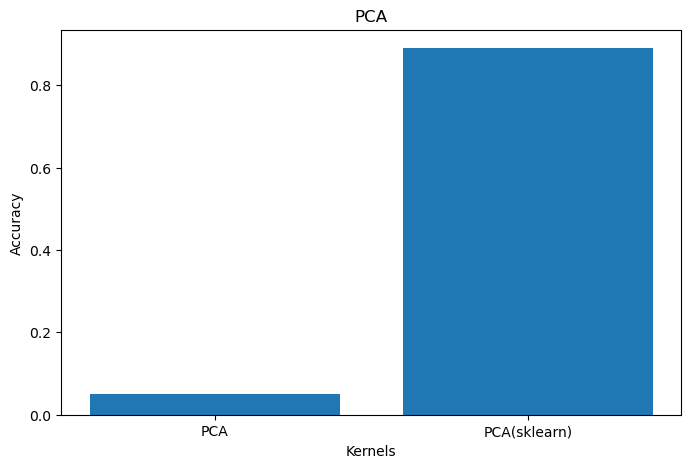

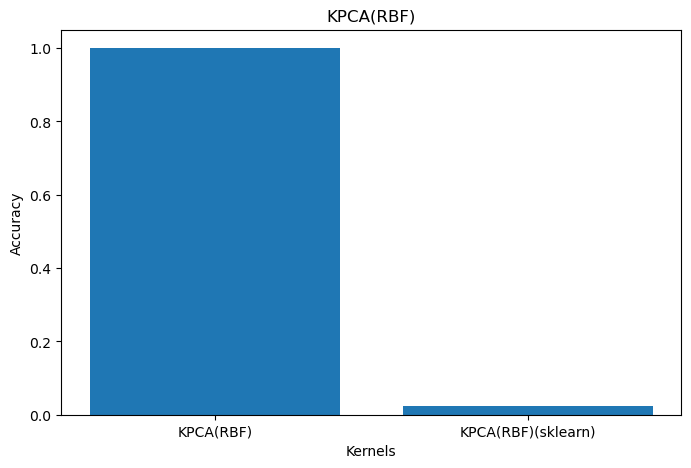

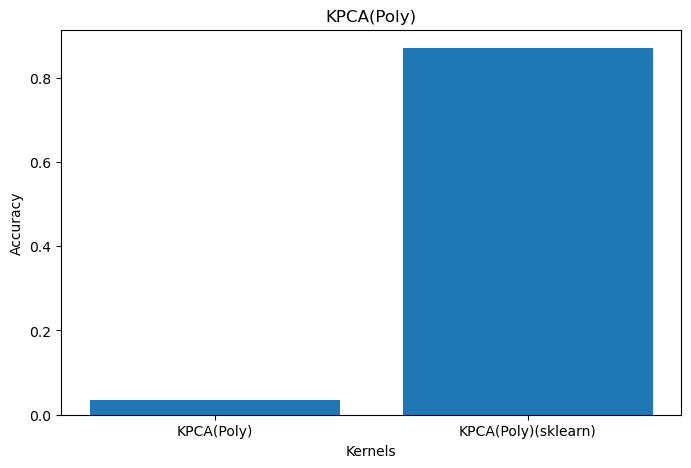

In [133]:
# use matplotlib to plot the accuracy

x = ['PCA', 'PCA(sklearn)']
y = [accuracy_pca, accuracy_pca_sklearn]
plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('PCA')
plt.show()

x = ['KPCA(RBF)', 'KPCA(RBF)(sklearn)']
y = [accuracy_kpca_rbf, accuracy_kpca_rbf_sklearn]
plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('KPCA(RBF)')
plt.show()

x = ['KPCA(Poly)', 'KPCA(Poly)(sklearn)']
y = [accuracy_kpca_poly, accuracy_kpca_poly_sklearn]
plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('KPCA(Poly)')
plt.show()

### Extra

In [146]:
# compute covariance matrix of the label attribute in the training data
covariance_matrix = np.cov(train_last_col, rowvar=False)
print("Covariance matrix of the label attribute in the training data: ", covariance_matrix)

Covariance matrix of the label attribute in the training data:  133.91959798994975


## Summary

we found that kernelPCA with rbf kernel outperformed.

The ranking of the algorithms is KernelPCA(rbf) > kernelPCA(poly) > PCA

The reason is that the kernelPCA performs non-linear dimensionality reduction. Thus capturing better relations between the features.


### Advantages and disadvantages of implementing PCA and KPCA from scratch versus using sci-kit-learn's built-in functions

Implementing from scratch:

Advantages:
- More control over the algorithm, such as the choice of kernel function for KPCA.
- Can be more efficient, especially for large datasets.

Disadvantages:
- More time-consuming and complex to implement.
- More likely to introduce errors.

Using sci-kit-learn's built-in functions:

Advantages:
- Quick and easy to use.
- Well-tested and reliable.

Disadvantages:
- Less control over the algorithm.
- May not be as efficient for large datasets.